# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [ ]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    
    if not isinstance(m, int) or not isinstance(n, int) or m <= 0 or n <= 0:
        return None
    
    t = np.linspace(0, 1, m)
    b = np.cos(4 * t)
    A = np.vander(t, n, increasing = True)
    return A, b

W zadaniu należało napisać funkcję spare_matrix_Abt(m, n), która generuje dane potrzebne do dalszych obliczeń numerycznych. Funkcja najpierw tworzy wektor t długości m, z wartościami równomiernie rozłożonymi w przedziale od 0 do 1. Następnie na podstawie tego wektora obliczany jest wektor b według zależności b = cos(4t). Kolejnym etapem jest utworzenie macierzy A o strukturze macierzy Vandermonde’a, w której każda kolejna kolumna zawiera potęgi wektora t: od t^0, czyli kolumny jedynek, przez t^1, t^2, aż do t^(n-1). Do utworzenia macierzy A wykorzystano funkcję vander z biblioteki NumPy z ustawionym parametrem increasing=True, co zapewnia odpowiedni układ kolumn zgodny z wymaganiami zadania. Funkcja zwraca dwie wartości: macierz A oraz wektor b. Rozwiązanie pozwala w prosty sposób przygotować dane wejściowe, które mogą być następnie użyte na przykład do aproksymacji wielomianowej lub zadań związanych z regresją.

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [5]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(m, int) or not isinstance(n, int) or m <= 0 or n <= 0:
        return None
    
    t = np.linspace(0, 1, m)
    b = np.cos(4 * t)
    A = np.vander(t, n, increasing = True)
    return A, b


def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    
    if A.ndim != 2 or b.ndim != 1:
        return None
    m, n = A.shape

    if b.shape[0] != m:
        return None
    
    A_new = A.T @ A
    b_new = A.T @ b
    
    return A_new, b_new

def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    if not all(isinstance(arr, np.ndarray) for arr in (A, x, b)):
        return None
    if A.ndim != 2 or x.ndim != 1 or b.ndim != 1:
        return None

    m, n = A.shape
    if x.shape[0] != n or b.shape[0] != m:
        return None

   
    r = A @ x - b

    
    norm_value = np.linalg.norm(r)

    return float(norm_value)
   

m, n = 50, 12
A, b = spare_matrix_Abt(m, n)

norm = []
time = []
memory = []

A_sq, b_sq = square_from_rectan(A, b)
x1 = np.linalg.solve(A_sq, b_sq)
res = residual_norm(A, x1, b)

norm.append(res)
t1 = %timeit -o np.linalg.solve(A_sq, b_sq)
time.append(t1)

m1 = %memit -o np.linalg.solve(A_sq, b_sq)
memory.append(m1)

x2, *_ = np.linalg.lstsq(A, b, rcond=None)
res2 = residual_norm(A, x2, b)

norm.append(res2)
t2 = %timeit -o np.linalg.lstsq(A, b, rcond=None)
time.append(t2)

m2 = %memit -o np.linalg.lstsq(A, b, rcond=None)
memory.append(m2)

Q, R = np.linalg.qr(A, mode="reduced")
x3 = sp.linalg.solve_triangular(R, Q.T @ b)
res3 = residual_norm(A, x3, b)

norm.append(res3)
t3 = %timeit -o sp.linalg.solve_triangular(R, Q.T @ b)
time.append(t3)

m3 = %memit -o sp.linalg.solve_triangular(R, Q.T @ b)
memory.append(m3)

U, S, Vt = np.linalg.svd(A, full_matrices = False)

S_inv = np.diag(1/S)

x4 = Vt.T @ S_inv @ (U.T @ b)

res4 = residual_norm(A, x4, b)

norm.append(res4)
t4 = %timeit -o Vt.T @ S_inv @ (U.T @ b)
time.append(t4)

m4 = %memit -o Vt.T @ S_inv @ (U.T @ b)
memory.append(m4)


print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")




12.3 μs ± 687 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 128.14 MiB, increment: 0.00 MiB
53.6 μs ± 2.57 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 128.14 MiB, increment: 0.00 MiB
29.2 μs ± 1.4 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
peak memory: 128.14 MiB, increment: 0.00 MiB
6.59 μs ± 74.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
peak memory: 128.14 MiB, increment: 0.00 MiB
Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.320e-07
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  12.3 μs ± 687 ns per loop (me
Druga metoda    :  53.6 μs ± 2.57 μs per loop (m
Trzecia metoda  :  29.2 μs ± 1.4 μs per loop (me
Czwarta metoda  :  6.59 μs ± 74.7 ns per loop (m

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 128.14 MiB, increment: 0.00 

W zadaniu drugim, korzystając z funkcji z Zadania 1, wygenerowałem macierz A oraz wektor b dla m = 50 i n = 12. Następnie rozwiązałem układ równań Ax = b czterema metodami: poprzez równania normalne, funkcję lstsq, rozkład QR oraz rozkład SVD. Dla każdej metody obliczyłem normę residuum oraz zmierzyłem czas wykonania i użycie pamięci. Największy błąd uzyskała metoda równań normalnych (1.320·10⁻⁷), natomiast pozostałe trzy metody dały taki sam, dużo mniejszy błąd (około 7.999·10⁻⁹). Najwolniejsza była metoda lstsq, szybsza QR, a najszybsza okazała się metoda SVD. Zużycie pamięci było identyczne dla wszystkich metod. Wyniki pokazują, że równania normalne są najmniej dokładne, natomiast najlepszymi metodami pod względem dokładności i szybkości działania okazał się QR oraz SVD.

In [ ]:
# Przykładowa forma zestawienia wyników
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {norm[0]:.3e}")
print(f"Druga metoda    :  {norm[1]:.3e}")
print(f"Trzecia metoda  :  {norm[2]:.3e}")
print(f"Czwarta metoda  :  {norm[3]:.3e}")
print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(time[0])[:29]}")
print(f"Druga metoda    :  {str(time[1])[:29]}")
print(f"Trzecia metoda  :  {str(time[2])[:29]}")
print(f"Czwarta metoda  :  {str(time[3])[:29]}")
print("")
print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(memory[0])}")
print(f"Druga metoda    :  {str(memory[1])}")
print(f"Trzecia metoda  :  {str(memory[2])}")
print(f"Czwarta metoda  :  {str(memory[3])}")

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  8.679e-08
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  15.64 μs ± 4.465 μs per loop 
Druga metoda    :  35.55 μs ± 4.073 μs per loop 
Trzecia metoda  :  28.63 μs ± 7.677 μs per loop 
Czwarta metoda  :  47.89 μs ± 6.177 μs per loop 

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 124.59 MiB, increment: 0.00 MiB
Druga metoda    :  peak memory: 124.59 MiB, increment: 0.00 MiB
Trzecia metoda  :  peak memory: 139.42 MiB, increment: 0.00 MiB
Czwarta metoda  :  peak memory: 140.44 MiB, increment: 0.00 MiB


---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [6]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

In [10]:
# ===== Twoja implementacja tutaj =====

a, b = np.polyfit(d, w, 1)

print("Współczynnik kierunkowy a =", a)
print("Wyraz wolny b =", b)

w_pred = a*d + b

mse = np.mean((w - w_pred)**2)
print("Średni błąd kwadratowy MSE =", mse)

Współczynnik kierunkowy a = 0.7860987817546508
Wyraz wolny b = -3.503635848521817
Średni błąd kwadratowy MSE = 340.51374067428463


W zadaniu trzecim należało wyznaczyć zależność liniową między dochodami a wydatkami gospodarstwa domowego. Do obliczenia współczynnika kierunkowego oraz wyrazu wolnego wykorzystałem funkcję polyfit z biblioteki NumPy. Otrzymany model regresji ma postać w = 0.786·d − 3.50, co oznacza, że wydatki rosną średnio o około 0.79 jednostki na każdą dodatkową jednostkę dochodu. Następnie obliczyłem średni błąd kwadratowy, który wyniósł około 340.51. Błąd nie jest duży, ale pokazuje, że dane nie leżą idealnie na prostej, więc model liniowy jest tylko przybliżeniem. Mimo tego regresja dobrze odzwierciedla ogólną zależność między dochodami a wydatkami i trudno byłoby osiągnąć istotnie lepszy wynik bez zastosowania bardziej złożonych modeli.

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

MODEL 1: ŷ = b0 + b1 * x1
Z2 shape: (100, 2)
b2 shape: (2, 1)
b2 (b0, b1) = [1.90282637 1.02352983]
MSE modelu 2 = 1.3794523825123586


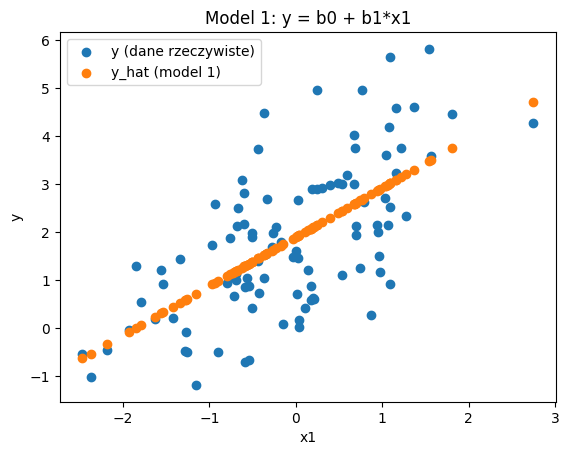

MODEL 2: ŷ = b0 + b1 * x2
Z2 shape: (100, 2)
b2 shape: (2, 1)
b2 (b0, b1) = [ 1.8774615  -0.35589945]
MSE modelu 2 = 2.241719935136401


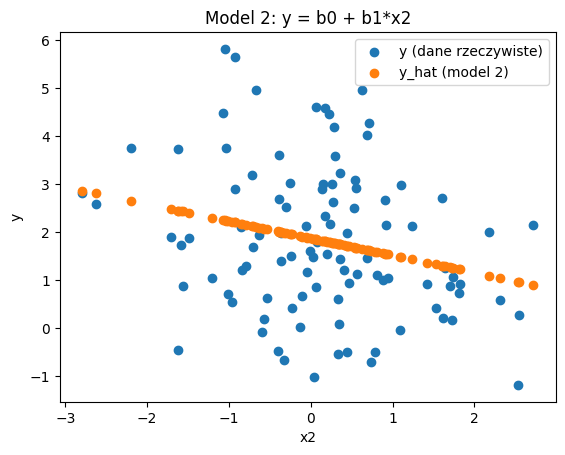

MODEL 3: ŷ = a + b1*x1 + b2*x2
Z3 shape: (100, 3)
b3 (a, b1, b2) = [ 1.98146414  1.12367218 -0.52819136]
MSE modelu 3 = 1.0553063645468033


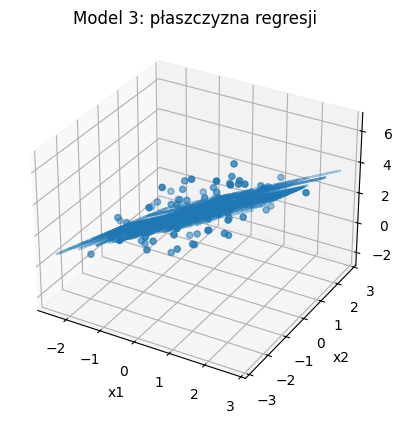

MODEL 4: ŷ = a + b1*x1 + b2*x2 + b3*(x1*x2)
Z4 shape: (100, 4)
b4 (a, b1, b2, b3) = [ 2.0133625   1.14713646 -0.55214739 -0.15522259]
MSE modelu 4 = 1.0314991869084142


In [12]:
# ===== Twoja implementacja tutaj =====
n = 100

x1 = np.random.normal(0, 1, (n, 1))
x2 = np.random.normal(0, 1, (n, 1))
eps = np.random.normal(0, 1, (n, 1))

y = 2 + x1 - 0.5 * x2 + eps

Z1 = np.concatenate([np.ones((n,1)), x1], axis=1)

Q, R = np.linalg.qr(Z1)

b1 = np.linalg.inv(R) @ Q.T @ y 

y_pred1 = Z1 @ b1

mse1 = np.mean((y - y_pred1)**2)
print("MODEL 1: ŷ = b0 + b1 * x1")
print("Z2 shape:", Z1.shape)
print("b2 shape:", b1.shape)
print("b2 (b0, b1) =", b1.flatten())
print("MSE modelu 2 =", mse1)



plt.figure()
plt.scatter(x1, y, label="y (dane rzeczywiste)")
plt.scatter(x1, y_pred1, label="y_hat (model 1)")
plt.title("Model 1: y = b0 + b1*x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()
plt.show()


Z2 = np.concatenate([np.ones((n,1)), x2], axis=1)  


Q2, R2 = np.linalg.qr(Z2, mode = 'reduced')  


b2 = np.linalg.inv(R2) @ Q2.T @ y 


y_hat2 = Z2 @ b2
mse2 = np.mean((y - y_hat2)**2)

print("MODEL 2: ŷ = b0 + b1 * x2")
print("Z2 shape:", Z2.shape)
print("b2 shape:", b2.shape)
print("b2 (b0, b1) =", b2.flatten())
print("MSE modelu 2 =", mse2)


plt.figure()
plt.scatter(x2, y, label="y (dane rzeczywiste)")
plt.scatter(x2, y_hat2, label="y_hat (model 2)")
plt.title("Model 2: y = b0 + b1*x2")
plt.xlabel("x2")
plt.ylabel("y")
plt.legend()
plt.show()


Z3 = np.concatenate([np.ones((n,1)), x1, x2], axis=1)  # (n, 3)


Q3, R3 = np.linalg.qr(Z3, mode='reduced')


b3 = np.linalg.inv(R3) @ Q3.T @ y


y_hat3 = Z3 @ b3
mse3 = np.mean((y - y_hat3)**2)

print("MODEL 3: ŷ = a + b1*x1 + b2*x2")
print("Z3 shape:", Z3.shape)
print("b3 (a, b1, b2) =", b3.flatten())
print("MSE modelu 3 =", mse3)

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, label="y (dane rzeczywiste)")


xx1, xx2 = np.meshgrid(x1, x2)
yy = b3[0] + b3[1] * xx1 + b3[2] * xx2  

ax.plot_wireframe(xx1, xx2, yy, alpha=0.4)

ax.set_title("Model 3: płaszczyzna regresji")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

plt.show()


x1x2 = x1 * x2

Z4 = np.concatenate([np.ones((n,1)), x1, x2, x1x2], axis=1)


Q4, R4 = np.linalg.qr(Z4, mode='reduced')


b4 = np.linalg.inv(R4) @ Q4.T @ y


y_hat4 = Z4 @ b4
mse4 = np.mean((y - y_hat4)**2)

print("MODEL 4: ŷ = a + b1*x1 + b2*x2 + b3*(x1*x2)")
print("Z4 shape:", Z4.shape)
print("b4 (a, b1, b2, b3) =", b4.flatten())
print("MSE modelu 4 =", mse4)



W zadaniu czwartym zasymulowano proces opisany równaniem y = 2 + x1 − 0.5x2 + e, gdzie x1 i x2 są zmiennymi wejściowymi generowanymi z rozkładu normalnego, a ε reprezentuje losowe zakłócenie procesu. Następnie przygotowane dane posłużyły do modelowania procesu za pomocą regresji liniowej. W analizie przyjęto, że dokładne równanie procesu nie jest znane i wykorzystywano jedynie dostępne dane wejściowe i wyjściowe.

Przeanalizowano cztery modele regresji liniowej o rosnącej stopniu złożoności:

model zależny tylko od zmiennej x1,

model zależny tylko od zmiennej x2,

model zależny od obu zmiennych x1 i x2,

model zawierający dodatkowo czynnik nieliniowy w postaci iloczynu x1·x2.

Dla wszystkich modeli utworzono macierz danych Z, zawierającą kolumnę jedynek (wyraz wolny) oraz odpowiednie zmienne wejściowe. Współczynniki regresji wyznaczono za pomocą rozkładu QR. Po obliczeniu współczynników uzyskano wartości przewidywane y_hat oraz wyznaczono błąd dopasowania MSE (Mean Squared Error).

Porównanie błędów pokazało oczekiwaną zależność: modele wykorzystujące więcej informacji opisują proces lepiej. Największy błąd uzyskały modele z jedną zmienną, natomiast najmniejszy błąd uzyskały modele (3) i (4), które wykorzystują obie zmienne wejściowe. Różnica między nimi jest niewielka, co oznacza, że dodanie składnika nieliniowego x1·x2 nie poprawia istotnie jakości dopasowania w tym przypadku. Ostatecznie najlepszym modelem jest model 3, ponieważ najdokładniej odzwierciedla zależność y = 2 + x1 − 0.5x2 przy najmniejszej liczbie parametrów.

WNIOSKI

Na podstawie przeprowadzonych obliczeń można stwierdzić, że poszczególne metody rozwiązywania układów liniowych różnią się dokładnością oraz wydajnością. Metoda równań normalnych okazała się najmniej dokładna, natomiast rozkład QR i SVD dały najdokładniejsze wyniki i stabilność numeryczną, a SVD był dodatkowo najszybszy. Analiza regresji pokazała, że modelowanie zależności między zmiennymi wymaga odpowiedniego doboru modelu: im więcej informacji (zmiennych) wykorzystuje model, tym mniejszy błąd dopasowania. Dodawanie bardziej złożonych składników modelu nie zawsze jednak znacząco poprawia wynik, co było widoczne w modelach z dodatkowym iloczynem zmiennych. Ćwiczenie pozwoliło porównać skuteczność metod numerycznych i pokazało, że wybór narzędzia powinien zależeć od kompromisu między dokładnością a złożonością obliczeniową.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)